# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [ ]:
picture_size = 48
folder_path = "/content/dataset"

In [ ]:
from google.colab import drive
drive.mount('/content/dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Ensure these variables are defined
folder_path = '/content/dataset/disgust'  # Update this to your actual folder path
expression = 'disgust'
picture_size = 128  # Update this to your actual picture size

# Get the list of files in the directory
file_list = os.listdir(os.path.join(folder_path, expression))

# Check if file_list is empty
if not file_list:
    raise ValueError(f"No files found in the directory {os.path.join(folder_path, 'train', expression)}")

# Plot images
plt.figure(figsize=(12, 12))
for i in range(1, min(10, len(file_list))):  # Ensure 'i' does not go out of bounds
    plt.subplot(3, 3, i)

    # Construct the full file path
    file_path = os.path.join(folder_path, expression, file_list[i])

    # Debugging print statements
    print(f"Loading image: {file_path}")

    # Load and display the image
    img = load_img(file_path, target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')  # Optional: Hide axes for better visualization

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/MyDrive/content/archive/images/images/train/disgust'

# Making Training and Validation Data

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 250 images belonging to 6 classes.
Found 250 images belonging to 6 classes.


# Model Building

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Debugging: Check the shape and type of the batches
for images, labels in train_set:
    print(f'Images batch shape: {images.shape}')
    print(f'Labels batch shape: {labels.shape}')
    print(f'Images dtype: {images.dtype}')
    print(f'Labels dtype: {labels.dtype}')
    break



Found 250 images belonging to 6 classes.
Found 250 images belonging to 6 classes.
Images batch shape: (32, 150, 150, 3)
Labels batch shape: (32,)
Images dtype: float32
Labels dtype: float32


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=48,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


Epoch 1/48
13/13 [==============================] - ETA: 0s - loss: -3381.8896 - accuracy: 0.1173

13/13 [==============================] - 10s 665ms/step - loss: -3381.8896 - accuracy: 0.1173 - val_loss: -11213.3340 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 2/48
13/13 [==============================] - ETA: 0s - loss: -25558.0684 - accuracy: 0.1250

13/13 [==============================] - 8s 661ms/step - loss: -25558.0684 - accuracy: 0.1250 - val_loss: -50222.2109 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 3/48
13/13 [==============================] - ETA: 0s - loss: -89365.9766 - accuracy: 0.1173

13/13 [==============================] - 7s 565ms/step - loss: -89365.9766 - accuracy: 0.1173 - val_loss: -145763.5625 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 4/48
13/13 [==============================] - ETA: 0s - loss: -224107.8906 - accuracy: 0.1250

13/13 [==============================] - 8s 628ms/step - loss: -224107.8906 - accuracy: 0.1250 - val_loss: -337885.2188 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 5/48
13/13 [==============================] - ETA: 0s - loss: -481737.0312 - accuracy: 0.1199

13/13 [==============================] - 8s 630ms/step - loss: -481737.0312 - accuracy: 0.1199 - val_loss: -678463.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 6/48
13/13 [==============================] - ETA: 0s - loss: -892190.0625 - accuracy: 0.1199

13/13 [==============================] - 7s 554ms/step - loss: -892190.0625 - accuracy: 0.1199 - val_loss: -1198767.5000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 7/48
13/13 [==============================] - ETA: 0s - loss: -1536503.3750 - accuracy: 0.1148

13/13 [==============================] - 9s 650ms/step - loss: -1536503.3750 - accuracy: 0.1148 - val_loss: -1950336.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 8/48
13/13 [==============================] - ETA: 0s - loss: -2393105.0000 - accuracy: 0.1224

13/13 [==============================] - 8s 624ms/step - loss: -2393105.0000 - accuracy: 0.1224 - val_loss: -3029090.2500 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 9/48
13/13 [==============================] - ETA: 0s - loss: -3622417.7500 - accuracy: 0.1199

13/13 [==============================] - 8s 631ms/step - loss: -3622417.7500 - accuracy: 0.1199 - val_loss: -4438857.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 10/48
13/13 [==============================] - ETA: 0s - loss: -5217111.5000 - accuracy: 0.1199

13/13 [==============================] - 7s 552ms/step - loss: -5217111.5000 - accuracy: 0.1199 - val_loss: -6318771.5000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 11/48
13/13 [==============================] - ETA: 0s - loss: -7283659.0000 - accuracy: 0.1173

13/13 [==============================] - 8s 606ms/step - loss: -7283659.0000 - accuracy: 0.1173 - val_loss: -8670107.0000 - val_accuracy: 0.1130 - lr: 0.0010
Epoch 12/48
13/13 [==============================] - ETA: 0s - loss: -9674214.0000 - accuracy: 0.1199

13/13 [==============================] - 8s 626ms/step - loss: -9674214.0000 - accuracy: 0.1199 - val_loss: -11543358.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 13/48
13/13 [==============================] - ETA: 0s - loss: -13418425.0000 - accuracy: 0.1122

13/13 [==============================] - 7s 545ms/step - loss: -13418425.0000 - accuracy: 0.1122 - val_loss: -15157739.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 14/48
13/13 [==============================] - ETA: 0s - loss: -16995758.0000 - accuracy: 0.1199

13/13 [==============================] - 8s 619ms/step - loss: -16995758.0000 - accuracy: 0.1199 - val_loss: -19356618.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 15/48
13/13 [==============================] - ETA: 0s - loss: -21804820.0000 - accuracy: 0.1173

13/13 [==============================] - 8s 636ms/step - loss: -21804820.0000 - accuracy: 0.1173 - val_loss: -24300182.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 16/48
13/13 [==============================] - ETA: 0s - loss: -26976222.0000 - accuracy: 0.1199

13/13 [==============================] - 7s 548ms/step - loss: -26976222.0000 - accuracy: 0.1199 - val_loss: -29805048.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 17/48
13/13 [==============================] - ETA: 0s - loss: -33049386.0000 - accuracy: 0.1148

13/13 [==============================] - 9s 712ms/step - loss: -33049386.0000 - accuracy: 0.1148 - val_loss: -36138552.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 18/48
13/13 [==============================] - ETA: 0s - loss: -40197052.0000 - accuracy: 0.1130

13/13 [==============================] - 8s 625ms/step - loss: -40197052.0000 - accuracy: 0.1130 - val_loss: -44212676.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 19/48
13/13 [==============================] - ETA: 0s - loss: -47917728.0000 - accuracy: 0.1173

13/13 [==============================] - 7s 544ms/step - loss: -47917728.0000 - accuracy: 0.1173 - val_loss: -52336020.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 20/48
13/13 [==============================] - ETA: 0s - loss: -56389464.0000 - accuracy: 0.1148

13/13 [==============================] - 8s 622ms/step - loss: -56389464.0000 - accuracy: 0.1148 - val_loss: -62422228.0000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 21/48
13/13 [==============================] - ETA: 0s - loss: -66743180.0000 - accuracy: 0.1148

13/13 [==============================] - 8s 620ms/step - loss: -66743180.0000 - accuracy: 0.1148 - val_loss: -72240064.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 22/48
13/13 [==============================] - ETA: 0s - loss: -79716416.0000 - accuracy: 0.1097

13/13 [==============================] - 8s 604ms/step - loss: -79716416.0000 - accuracy: 0.1097 - val_loss: -84988064.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 23/48
13/13 [==============================] - ETA: 0s - loss: -90601160.0000 - accuracy: 0.1199

13/13 [==============================] - 7s 548ms/step - loss: -90601160.0000 - accuracy: 0.1199 - val_loss: -97524488.0000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 24/48
13/13 [==============================] - ETA: 0s - loss: -104747968.0000 - accuracy: 0.1097

13/13 [==============================] - 8s 620ms/step - loss: -104747968.0000 - accuracy: 0.1097 - val_loss: -110843656.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 25/48
13/13 [==============================] - ETA: 0s - loss: -116385888.0000 - accuracy: 0.1199

13/13 [==============================] - 8s 615ms/step - loss: -116385888.0000 - accuracy: 0.1199 - val_loss: -127006704.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 26/48
13/13 [==============================] - ETA: 0s - loss: -133666056.0000 - accuracy: 0.1173

13/13 [==============================] - 7s 543ms/step - loss: -133666056.0000 - accuracy: 0.1173 - val_loss: -143674304.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 27/48
13/13 [==============================] - ETA: 0s - loss: -151826832.0000 - accuracy: 0.1199

13/13 [==============================] - 7s 553ms/step - loss: -151826832.0000 - accuracy: 0.1199 - val_loss: -162611184.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 28/48
13/13 [==============================] - ETA: 0s - loss: -169893200.0000 - accuracy: 0.1199

13/13 [==============================] - 8s 611ms/step - loss: -169893200.0000 - accuracy: 0.1199 - val_loss: -183292848.0000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 29/48
13/13 [==============================] - ETA: 0s - loss: -192399632.0000 - accuracy: 0.1122

13/13 [==============================] - 7s 544ms/step - loss: -192399632.0000 - accuracy: 0.1122 - val_loss: -202633456.0000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 30/48
13/13 [==============================] - ETA: 0s - loss: -210324288.0000 - accuracy: 0.1224

13/13 [==============================] - 8s 611ms/step - loss: -210324288.0000 - accuracy: 0.1224 - val_loss: -225714624.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 31/48
13/13 [==============================] - ETA: 0s - loss: -237091040.0000 - accuracy: 0.1148

13/13 [==============================] - 8s 606ms/step - loss: -237091040.0000 - accuracy: 0.1148 - val_loss: -253138656.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 32/48
13/13 [==============================] - ETA: 0s - loss: -263792688.0000 - accuracy: 0.1199

13/13 [==============================] - 7s 563ms/step - loss: -263792688.0000 - accuracy: 0.1199 - val_loss: -275464960.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 33/48
13/13 [==============================] - ETA: 0s - loss: -293634976.0000 - accuracy: 0.1173

13/13 [==============================] - 7s 568ms/step - loss: -293634976.0000 - accuracy: 0.1173 - val_loss: -304384288.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 34/48
13/13 [==============================] - ETA: 0s - loss: -319498624.0000 - accuracy: 0.1173

13/13 [==============================] - 8s 618ms/step - loss: -319498624.0000 - accuracy: 0.1173 - val_loss: -335771936.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 35/48
13/13 [==============================] - ETA: 0s - loss: -355703072.0000 - accuracy: 0.1122

13/13 [==============================] - 8s 643ms/step - loss: -355703072.0000 - accuracy: 0.1122 - val_loss: -367742912.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 36/48
13/13 [==============================] - ETA: 0s - loss: -379733216.0000 - accuracy: 0.1276

13/13 [==============================] - 7s 546ms/step - loss: -379733216.0000 - accuracy: 0.1276 - val_loss: -401150848.0000 - val_accuracy: 0.1130 - lr: 0.0010
Epoch 37/48
13/13 [==============================] - ETA: 0s - loss: -416691936.0000 - accuracy: 0.1224

13/13 [==============================] - 9s 724ms/step - loss: -416691936.0000 - accuracy: 0.1224 - val_loss: -437164864.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 38/48
13/13 [==============================] - ETA: 0s - loss: -455299712.0000 - accuracy: 0.1173

13/13 [==============================] - 8s 644ms/step - loss: -455299712.0000 - accuracy: 0.1173 - val_loss: -473586048.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 39/48
13/13 [==============================] - ETA: 0s - loss: -488795840.0000 - accuracy: 0.1250

13/13 [==============================] - 7s 555ms/step - loss: -488795840.0000 - accuracy: 0.1250 - val_loss: -511574208.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 40/48
13/13 [==============================] - ETA: 0s - loss: -535119296.0000 - accuracy: 0.1199

13/13 [==============================] - 8s 600ms/step - loss: -535119296.0000 - accuracy: 0.1199 - val_loss: -557775296.0000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 41/48
13/13 [==============================] - ETA: 0s - loss: -574872832.0000 - accuracy: 0.1199

13/13 [==============================] - 8s 620ms/step - loss: -574872832.0000 - accuracy: 0.1199 - val_loss: -598743744.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 42/48
13/13 [==============================] - ETA: 0s - loss: -617034880.0000 - accuracy: 0.1173

13/13 [==============================] - 8s 603ms/step - loss: -617034880.0000 - accuracy: 0.1173 - val_loss: -641685120.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 43/48
13/13 [==============================] - ETA: 0s - loss: -664248768.0000 - accuracy: 0.1199

13/13 [==============================] - 7s 552ms/step - loss: -664248768.0000 - accuracy: 0.1199 - val_loss: -682711936.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 44/48
13/13 [==============================] - ETA: 0s - loss: -711441408.0000 - accuracy: 0.1148

13/13 [==============================] - 8s 615ms/step - loss: -711441408.0000 - accuracy: 0.1148 - val_loss: -740436096.0000 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 45/48
13/13 [==============================] - ETA: 0s - loss: -762363840.0000 - accuracy: 0.1148

13/13 [==============================] - 8s 638ms/step - loss: -762363840.0000 - accuracy: 0.1148 - val_loss: -793085824.0000 - val_accuracy: 0.1130 - lr: 0.0010
Epoch 46/48
13/13 [==============================] - ETA: 0s - loss: -804280512.0000 - accuracy: 0.1224

13/13 [==============================] - 7s 549ms/step - loss: -804280512.0000 - accuracy: 0.1224 - val_loss: -846115584.0000 - val_accuracy: 0.1202 - lr: 0.0010
Epoch 47/48
13/13 [==============================] - ETA: 0s - loss: -863574400.0000 - accuracy: 0.1173

13/13 [==============================] - 8s 621ms/step - loss: -863574400.0000 - accuracy: 0.1173 - val_loss: -903900544.0000 - val_accuracy: 0.1154 - lr: 0.0010
Epoch 48/48
13/13 [==============================] - ETA: 0s - loss: -917297152.0000 - accuracy: 0.1202

13/13 [==============================] - 8s 634ms/step - loss: -917297152.0000 - accuracy: 0.1202 - val_loss: -957099264.0000 - val_accuracy: 0.1202 - lr: 0.0010


# Plotting Accuracy & Loss

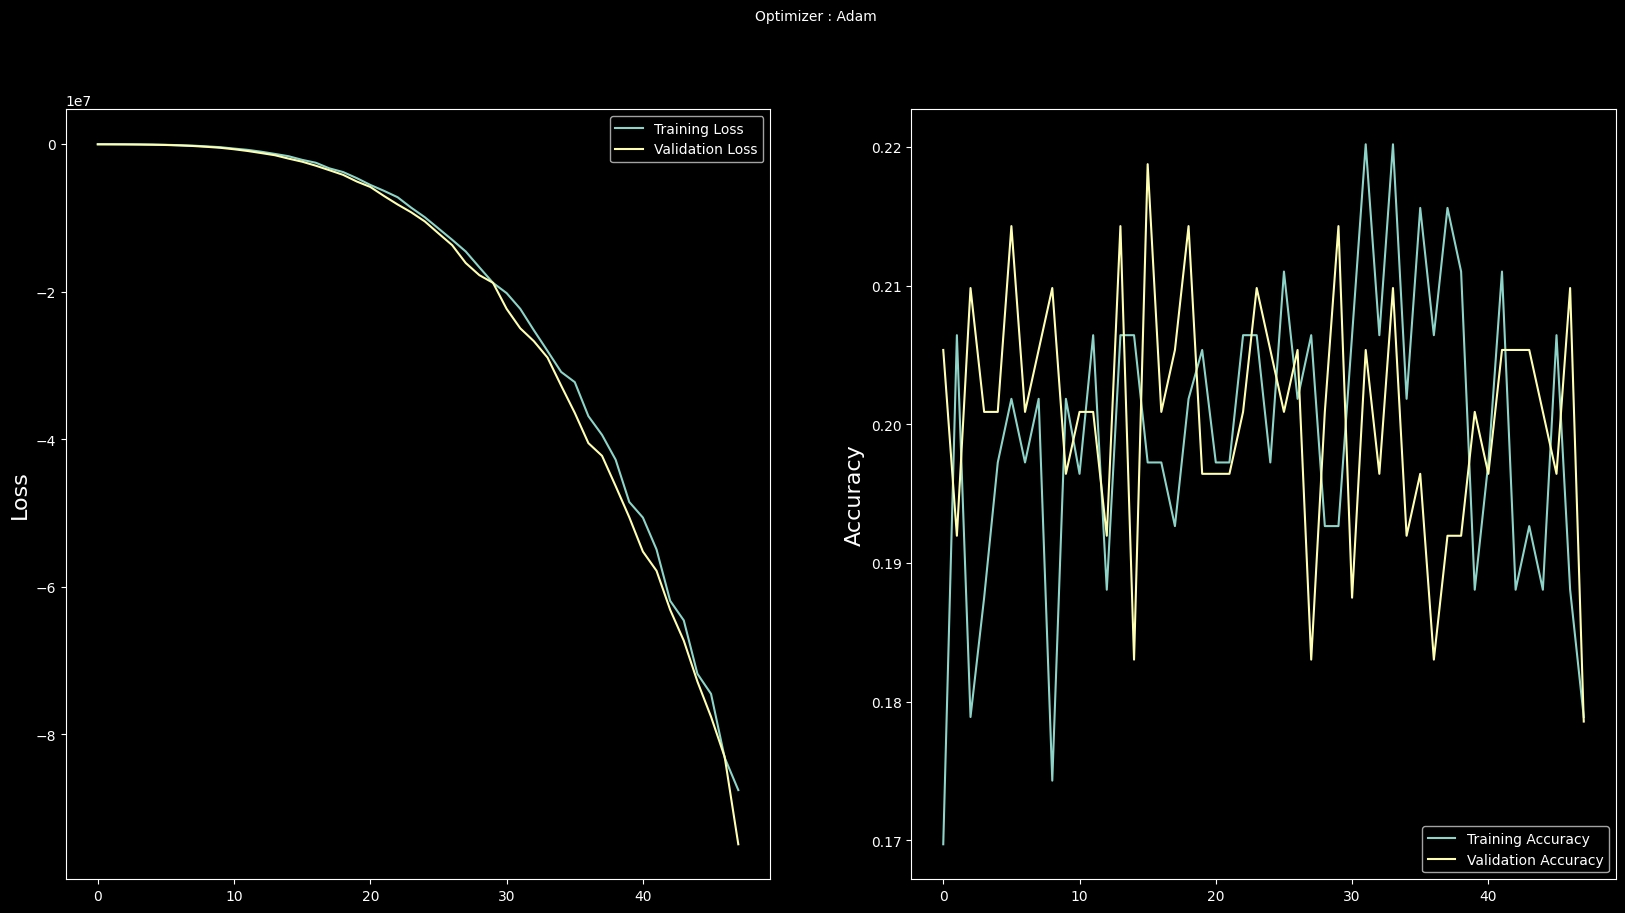

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()